## 환경 세팅

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 318.16 KiB | 22.72 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.tmux.conf
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.bashrc.biolab
./root/.condarc
./root/.profile
./root/.vimrc
--2025-06-12 00:08:38--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 

In [3]:
!conda install -y subread

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.4.26  |       hbd8a1cb_0         149 KB  conda-forge
    conda-25.5.1               |  py313h78bf25f_0         1.1 MB  conda-forge
    subread-2.0.1              |       h5bf99c6_1        22.8 MB  bioconda
    ------------------------------------------------------------
                                           Total:        24.1 MB

The following NEW packages will be INSTALLED:

  subread            bioconda/linux-64::subread-2.0.1-h5bf9

## gtf 파일 준비

In [4]:
%cd /content/drive/MyDrive/생정실/프로젝트

/content/drive/MyDrive/생정실/프로젝트


In [5]:
!wget ftp://ftp.ensemblgenomes.org/pub/plants/release-54/gtf/arabidopsis_thaliana/Arabidopsis_thaliana.TAIR10.54.gtf.gz
!gunzip Arabidopsis_thaliana.TAIR10.54.gtf.gz

--2025-06-12 00:15:08--  ftp://ftp.ensemblgenomes.org/pub/plants/release-54/gtf/arabidopsis_thaliana/Arabidopsis_thaliana.TAIR10.54.gtf.gz
           => ‘Arabidopsis_thaliana.TAIR10.54.gtf.gz’
Resolving ftp.ensemblgenomes.org (ftp.ensemblgenomes.org)... 193.62.193.161
Connecting to ftp.ensemblgenomes.org (ftp.ensemblgenomes.org)|193.62.193.161|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/plants/release-54/gtf/arabidopsis_thaliana ... done.
==> SIZE Arabidopsis_thaliana.TAIR10.54.gtf.gz ... 10909685
==> PASV ... done.    ==> RETR Arabidopsis_thaliana.TAIR10.54.gtf.gz ... done.
Length: 10909685 (10M) (unauthoritative)

Arabidopsis_thalian 100%[===================>]  10.40M  11.9MB/s    in 0.9s    

2025-06-12 00:15:10 (11.9 MB/s) - ‘Arabidopsis_thaliana.TAIR10.54.gtf.gz’ saved [10909685]



# read Count 구하기

In [6]:
!featureCounts -p -a Arabidopsis_thaliana.TAIR10.54.gtf -o read-counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o CLIP_c_Aligned.sortedByCoord.out.bam           ||
||                           o CLIP_g_Aligned.sortedByCoord.out.bam           ||
||                           o Ribo_c_Aligned.sortedByCoord.out.bam           ||
||                           o Ribo_g_Aligned.sortedByCoord.out.b

In [7]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP_c_Aligned.sortedByCoord.out.bam,CLIP_g_Aligned.sortedByCoord.out.bam,Ribo_c_Aligned.sortedByCoord.out.bam,Ribo_g_Aligned.sortedByCoord.out.bam,RNA_c_Aligned.sortedByCoord.out.bam,RNA_g_Aligned.sortedByCoord.out.bam
Geneid,,,,,,,,,,,
AT1G30814,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,10942648;10942648;10942648;10942663;10943007;1...,10942909;10942909;10942909;10942909;10943060;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,1657,0,0,0,0,0,0
AT1G78930,1;1;1;1;1;1;1,29677904;29678707;29679017;29679327;29679538;2...,29678618;29678924;29679199;29679440;29679783;2...,-;-;-;-;-;-;-,2266,0,0,2,11,85,43
AT1G71695,1;1;1,26964087;26965591;26965943,26964625;26965785;26966688,+;+;+,1480,0,105,102,128,1894,1359
AT1G58983,1;1,21805932;21806783,21806440;21807496,-;-,1223,0,0,0,0,0,0
AT1G12980,1,4429718,4430965,+,1248,0,0,0,0,2,1


In [8]:
cnts['clip_enrichment'] = cnts['CLIP_g_Aligned.sortedByCoord.out.bam'] / cnts['RNA_c_Aligned.sortedByCoord.out.bam']
cnts['rden_change'] = (cnts['Ribo_g_Aligned.sortedByCoord.out.bam']/cnts['RNA_g_Aligned.sortedByCoord.out.bam']) / (cnts['Ribo_c_Aligned.sortedByCoord.out.bam']/cnts['RNA_c_Aligned.sortedByCoord.out.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP_c_Aligned.sortedByCoord.out.bam,CLIP_g_Aligned.sortedByCoord.out.bam,Ribo_c_Aligned.sortedByCoord.out.bam,Ribo_g_Aligned.sortedByCoord.out.bam,RNA_c_Aligned.sortedByCoord.out.bam,RNA_g_Aligned.sortedByCoord.out.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
AT1G30814,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,10942648;10942648;10942648;10942663;10943007;1...,10942909;10942909;10942909;10942909;10943060;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,1657,0,0,0,0,0,0,NaN,NaN
AT1G78930,1;1;1;1;1;1;1,29677904;29678707;29679017;29679327;29679538;2...,29678618;29678924;29679199;29679440;29679783;2...,-;-;-;-;-;-;-,2266,0,0,2,11,85,43,0.000000,10.872093
AT1G71695,1;1;1,26964087;26965591;26965943,26964625;26965785;26966688,+;+;+,1480,0,105,102,128,1894,1359,0.055438,1.748921
AT1G58983,1;1,21805932;21806783,21806440;21807496,-;-,1223,0,0,0,0,0,0,NaN,NaN
AT1G12980,1,4429718,4430965,+,1248,0,0,0,0,2,1,0.000000,NaN


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


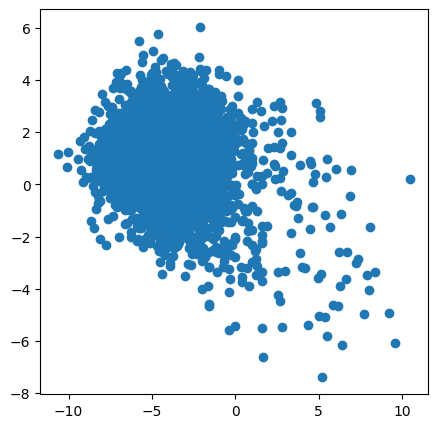

In [9]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-12-3737336961>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cnts_clean = cnts[cnts[['clip_enrichment', 'rden_change']].applymap(np.isfinite).all(axis=1)]


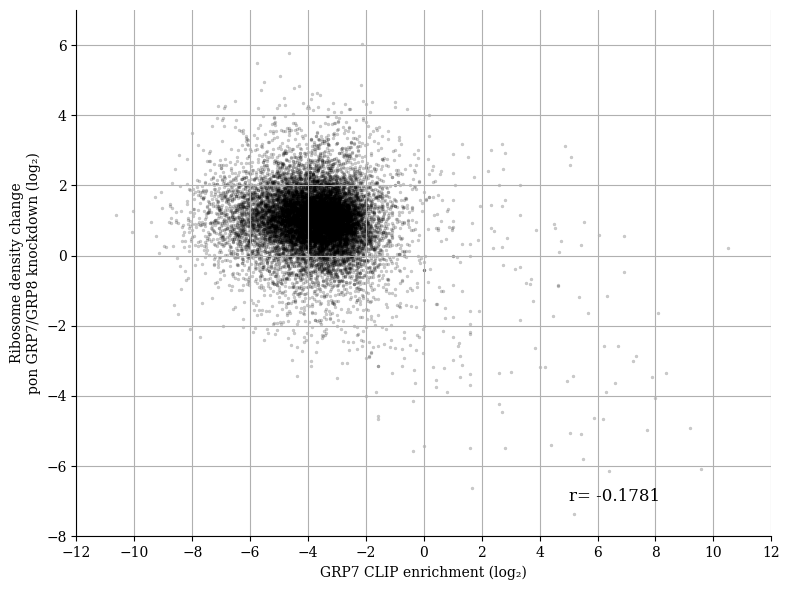

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr



cnts['clip_enrichment'] = np.log2(cnts['CLIP_g_Aligned.sortedByCoord.out.bam'] / cnts['RNA_c_Aligned.sortedByCoord.out.bam'])
cnts['rden_change'] = np.log2((cnts['Ribo_g_Aligned.sortedByCoord.out.bam']/cnts['RNA_g_Aligned.sortedByCoord.out.bam']) / (cnts['Ribo_c_Aligned.sortedByCoord.out.bam']/cnts['RNA_c_Aligned.sortedByCoord.out.bam']))
cnts.head()

cnts_clean = cnts[cnts[['clip_enrichment', 'rden_change']].applymap(np.isfinite).all(axis=1)]

plt.figure(figsize=(8,6))
sns.scatterplot(data=cnts_clean, x='clip_enrichment',y='rden_change',s=5, alpha=0.2, edgecolor=None, color='black')

r, _ = pearsonr(cnts_clean['clip_enrichment'],cnts_clean['rden_change'])
plt.text(5, -7, f'r= {r:.4f}', fontsize=12)

plt.xlim(-12, 12)
plt.ylim(-8, 7)
plt.xticks([-12,-10,-8,-6, -4, -2, 0, 2, 4,6,8,10,12])
plt.yticks([-8,-6,-4,-2, 0, 2,4,6])

plt.xlabel('GRP7 CLIP enrichment (log₂)')
plt.ylabel('Ribosome density change\npon GRP7/GRP8 knockdown (log₂)')
plt.rcParams['font.family'] = 'serif'

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(True)
plt.tight_layout()
plt.show()

# Protein localization 반영하기

In [14]:
aralocal = pd.read_csv('/content/drive/MyDrive/생정실/프로젝트/uniprotkb_arabidopsis_AND_model_organis_2025_06_12.tsv', sep='\t')
aralocal.head()

,Entry,Gene Names (ordered locus),Subcellular location [CC]
0,A0A0A7EPL0,At1g08910,SUBCELLULAR LOCATION: Nucleus {ECO:0000305}.
1,A0A178UEF6,AXX17_At5g23730,SUBCELLULAR LOCATION: Membrane {ECO:0000256|AR...
2,A0A178UFM8,At5g51560 AXX17_At5g50380,SUBCELLULAR LOCATION: Membrane {ECO:0000256|AR...
3,A0A178UFS2,AXX17_At5g34420,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000256|A...
4,A0A178UIP5,AXX17_At5g39930,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...


In [15]:
# 열 이름 정리
aralocal = aralocal.rename(columns={'Gene Names (ordered locus)':'Gene names', 'Subcellular location [CC]': 'type'})

In [18]:
# 결측치 제거
aralocal = aralocal[aralocal['Gene names'].notnull()]

In [20]:
# 결측치 제거
aralocal = aralocal[aralocal['type'].notnull()]

In [22]:
# AXX17라고 되어있는거 제거
aralocal = aralocal[~aralocal['Gene names'].str.contains('AXX17', na=False)]

In [24]:
# gene name 대문자로 통일
aralocal['Gene names'] = aralocal['Gene names'].str.upper()

<ipython-input-24-2159954568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aralocal['Gene names'] = aralocal['Gene names'].str.upper()


In [25]:
aralocal

,Entry,Gene names,type
0,A0A0A7EPL0,AT1G08910,SUBCELLULAR LOCATION: Nucleus {ECO:0000305}.
14,A0A178VEK7,AT3G60460,SUBCELLULAR LOCATION: Nucleus {ECO:0000255|PRO...
23,A0A178WF56,AT1G56060,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...
28,A0A1I9LMX5,AT3G50610,SUBCELLULAR LOCATION: [C-terminally encoded pe...
29,A0A1I9LN01,AT3G55850,SUBCELLULAR LOCATION: Membrane {ECO:0000255}; ...
...,...,...,...
136001,Q9ZVZ4,AT1G05440,SUBCELLULAR LOCATION: Endoplasmic reticulum me...
136004,Q9ZW00,AT1G05380,SUBCELLULAR LOCATION: Nucleus {ECO:0000256|ARB...
136156,W8PUF9,AT5G11130,SUBCELLULAR LOCATION: Golgi apparatus membrane...
136226,W8Q376,AT3G07620,SUBCELLULAR LOCATION: Golgi apparatus membrane...


In [26]:
# type 정제하기
aralocal['type'] = aralocal['type'].str.replace("SUBCELLULAR LOCATION: ", "", regex=False)

<ipython-input-26-4207888856>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aralocal['type'] = aralocal['type'].str.replace("SUBCELLULAR LOCATION: ", "", regex=False)


In [37]:
aralocal['type'] = aralocal['type'].str.replace(r"\s*\{ECO:[^}]*\}", "", regex=True)
aralocal['type'] = aralocal['type'].str.replace(r"Note=.*", "", regex=True)
aralocal['type'] = aralocal['type'].str.split(';').str[0]
aralocal['type'] = aralocal['type'].str.replace(r"\[.*?\]:\s*", "", regex=True)

<ipython-input-37-1473936682>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aralocal['type'] = aralocal['type'].str.replace(r"\s*\{ECO:[^}]*\}", "", regex=True)
<ipython-input-37-1473936682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aralocal['type'] = aralocal['type'].str.replace(r"Note=.*", "", regex=True)
<ipython-input-37-1473936682>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [40]:
# 세 가지로 나누기
def classify_location(text):
    text = text.lower()  # 소문자 처리로 조건 단순화

    if "nucleus" in text:
        return "nucleus"
    elif "cytoplasm" in text:
        return "cytoplasm"
    elif "membrane" in text or "integral" in text:
        return "integral membrane"
    else:
        return "other"

# 새 열 추가 or 기존 'type' 열 덮어쓰기
aralocal['type_new'] = aralocal['type'].apply(classify_location)

<ipython-input-40-4286366666>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aralocal['type_new'] = aralocal['type'].apply(classify_location)


In [43]:
aralocal

,Entry,Gene names,type,type_new
0,A0A0A7EPL0,AT1G08910,Nucleus.,nucleus
14,A0A178VEK7,AT3G60460,Nucleus.,nucleus
23,A0A178WF56,AT1G56060,Cell membrane,integral membrane
28,A0A1I9LMX5,AT3G50610,"Secreted, extracellular space, apoplast.",other
29,A0A1I9LN01,AT3G55850,Membrane,integral membrane
...,...,...,...,...
136001,Q9ZVZ4,AT1G05440,Endoplasmic reticulum membrane.,integral membrane
136004,Q9ZW00,AT1G05380,Nucleus.,nucleus
136156,W8PUF9,AT5G11130,Golgi apparatus membrane,integral membrane
136226,W8Q376,AT3G07620,Golgi apparatus membrane,integral membrane


# 합쳐서 시각화

In [44]:
# 합치기
aralocal_indexed = aralocal.set_index('Gene names')
cnts_merged = cnts.join(aralocal_indexed, how='inner')

In [45]:
cnts_merged.head()

,Chr,Start,End,Strand,Length,CLIP_c_Aligned.sortedByCoord.out.bam,CLIP_g_Aligned.sortedByCoord.out.bam,Ribo_c_Aligned.sortedByCoord.out.bam,Ribo_g_Aligned.sortedByCoord.out.bam,RNA_c_Aligned.sortedByCoord.out.bam,RNA_g_Aligned.sortedByCoord.out.bam,clip_enrichment,rden_change,Entry,type,type_new
Geneid,,,,,,,,,,,,,,,,
AT1G71695,1;1;1,26964087;26965591;26965943,26964625;26965785;26966688,+;+;+,1480,0,105,102,128,1894,1359,-4.172975,0.806466,Q96520,Secreted. Vacuole.,other
AT1G71695,1;1;1,26964087;26965591;26965943,26964625;26965785;26966688,+;+;+,1480,0,105,102,128,1894,1359,-4.172975,0.806466,Q570F0,Vacuole.,other
AT1G12980,1,4429718,4430965,+,1248,0,0,0,0,2,1,-inf,NaN,Q9SAD4,Nucleus.,nucleus
AT1G66852,1,24938500,24938832,-,333,0,0,0,0,0,0,NaN,NaN,B3H5T6,Cell membrane,integral membrane
AT1G69810,1;1;1;1;1;1;1;1,26276948;26276948;26277773;26277773;26277988;2...,26277684;26277684;26277886;26277886;26278871;2...,-;-;-;-;-;-;-;-,1940,0,1,6,13,108,76,-6.754888,1.622437,A0A1P8AQG7,Nucleus.,nucleus
